# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

# File to Load
city_data = "resources/city_data.csv"
ride_data = "resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [4]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [5]:
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_drivers = rural_driver_count.sum()
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_drivers = suburban_driver_count.sum()
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_drivers = urban_driver_count.sum()


In [6]:
rides_by_type = pyber_data_df.groupby(['type']).count()['ride_id']
rides_by_type_df = pd.DataFrame()
rides_by_type_df['ride_id'] = rides_by_type
rides_by_type_df

,ride_id
type,
Rural,125
Suburban,625
Urban,1625


In [7]:
driver_count_type_df = pd.DataFrame()

In [8]:
city_types = ["Rural", "Suburban", "Urban"]
drivers_count = [rural_drivers, suburban_drivers, urban_drivers]

In [9]:
# 2. Get the total drivers for each city type

driver_count_type_df['driver_count'] = drivers_count
driver_count_type_df.index = city_types

driver_count_type_df

,driver_count
Rural,78.0
Suburban,490.0
Urban,2405.0


In [10]:
#  3. Get the total amount of fares for each city type
total_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']
total_fares_by_type_df = pd.DataFrame()
total_fares_by_type_df['Total Fares by Type'] = total_fares_by_type
total_fares_by_type_df

,Total Fares by Type
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [11]:
#  4. Get the average fare per ride for each city type. 
average_fares_by_type = pyber_data_df.groupby(['type']).mean()['fare']
average_fares_by_type_df = pd.DataFrame()
average_fares_by_type_df['Average Fare per Ride'] = average_fares_by_type
average_fares_by_type_df

,Average Fare per Ride
type,
Rural,34.623440
Suburban,30.970128
Urban,24.525772


In [12]:
# 5. Get the average fare per driver for each city type. 
average_fares_by_driver = pyber_data_df.groupby(['type']).sum()['fare'] / driver_count_type_df['driver_count']
average_fares_by_driver_df = pd.DataFrame()
average_fares_by_driver_df['Average Fares per Driver'] = average_fares_by_driver
average_fares_by_driver_df

,Average Fares per Driver
type,
Rural,55.486282
Suburban,39.502714
Urban,16.571468


In [13]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame()
pyber_summary_df['Total Rides'] = rides_by_type
pyber_summary_df['Total Drivers'] = driver_count_type_df
pyber_summary_df['Total Fares'] = total_fares_by_type_df
pyber_summary_df['Average Fare per Ride'] = average_fares_by_type_df
pyber_summary_df['Average Fare per Driver'] = average_fares_by_driver_df

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78.0,4327.93,34.623440,55.486282
Suburban,625,490.0,19356.33,30.970128,39.502714
Urban,1625,2405.0,39854.38,24.525772,16.571468


In [14]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [15]:
#  8. Format the columns.
rides_by_type_df = rides_by_type_df['ride_id'].map("{:,}".format)
driver_count_type_df = driver_count_type_df['driver_count'].astype(int).map("{:,}".format)
total_fares_by_type_df = total_fares_by_type_df['Total Fares by Type'].map("${:,.2f}".format)
average_fares_by_type_df = average_fares_by_type_df['Average Fare per Ride'].map("${:,.2f}".format)
average_fares_by_driver_df = average_fares_by_driver_df['Average Fares per Driver'].map("${:,.2f}".format)

pyber_summary_df['Total Rides'] = rides_by_type_df
pyber_summary_df['Total Drivers'] = driver_count_type_df
pyber_summary_df['Total Fares'] = total_fares_by_type_df
pyber_summary_df['Average Fare per Ride'] = average_fares_by_type_df
pyber_summary_df['Average Fare per Driver'] = average_fares_by_driver_df

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [16]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_graph = pyber_data_df.groupby(['date', 'type']).sum()['fare']
pyber_graph_df = pd.DataFrame()
pyber_graph_df = pyber_graph
pyber_graph_df

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [18]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_graph_df = pyber_graph_df.reset_index()
pyber_graph_df

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [19]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot_df = pd.DataFrame(
    pyber_graph_df.pivot(index= 'date', columns= 'type', values= 'fare')
)
pyber_pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [20]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_chart = pyber_pivot_df.loc['2019-01-01':'2019-04-28']
pyber_chart_df = pd.DataFrame()
pyber_chart_df = pyber_chart
pyber_chart_df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [21]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pyber_chart_df.index = pd.to_datetime(pyber_chart_df.index)
pyber_chart_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [22]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_chart_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [23]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_plot = pyber_chart_df.resample('w').sum()
pyber_plot_df = pd.DataFrame()
pyber_plot_df = pyber_plot
pyber_plot_df


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


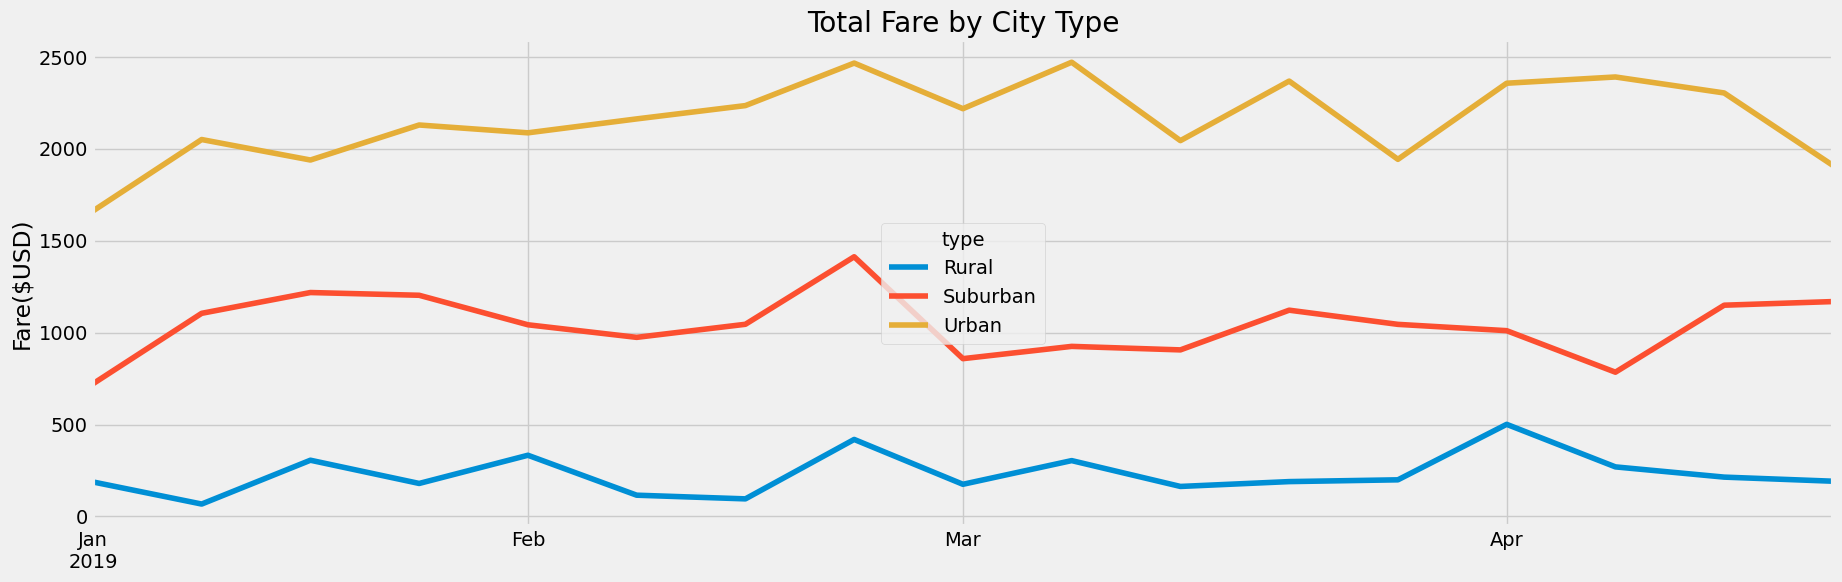

In [25]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
pyber_plot_df.plot(figsize= (20,6))
style.use('fivethirtyeight')
plt.ylabel('Fare($USD)')
plt.xlabel('')
plt.title('Total Fare by City Type')
plt.savefig(os.path.join('figures', 'Pyber_fare_summary.png'))
plt.show()
